## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Visualización de los datos

---

En esta libreta se realiza una visualización básica de los datos del escenario. 

In [1]:
# Importación de librerías y supresión de advertencias
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

Lectura de los datos desde el directorio data/raw

In [2]:
# Lectura de los datos
df = pd.read_csv('../data/raw/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Visualización de algunas propiedades del dataset

In [3]:
# Dimensiones del dataset
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset tiene 41188 filas y 21 columnas.


In [4]:
# Se obtiene una descripción estadística de las columnas numéricas del DataFrame
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Se obtiene una descripción estadística de las columnas categóricas del DataFrame
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Distribución de la variable objetivo

Es importante observar el balance de clases en la variable `y` (respuesta del cliente a la campaña).
Esto permite anticipar si habrá desbalance que afecte el modelo predictivo.


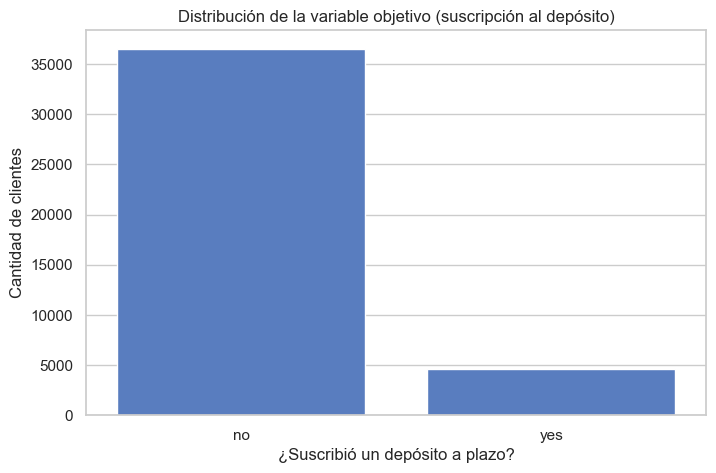

y
no     88.73
yes    11.27
Name: proportion, dtype: float64

In [7]:
sns.countplot(x="y", data=df)
plt.title("Distribución de la variable objetivo (suscripción al depósito)")
plt.xlabel("¿Suscribió un depósito a plazo?")
plt.ylabel("Cantidad de clientes")
plt.show()

df["y"].value_counts(normalize=True).mul(100).round(2)


### Distribución de variables categóricas

Las variables categóricas permiten entender mejor la composición del conjunto de clientes.

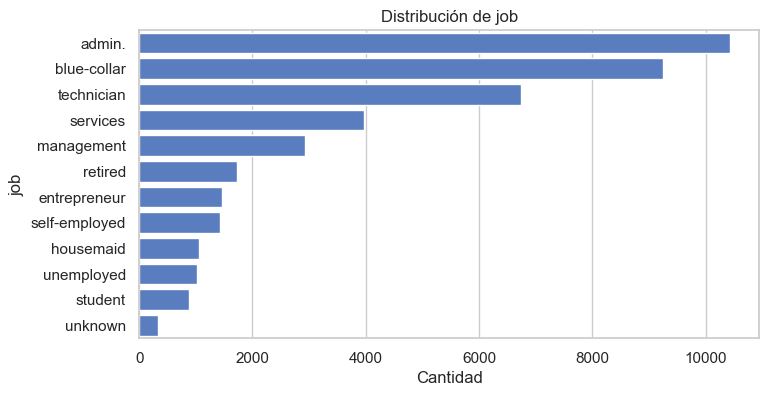

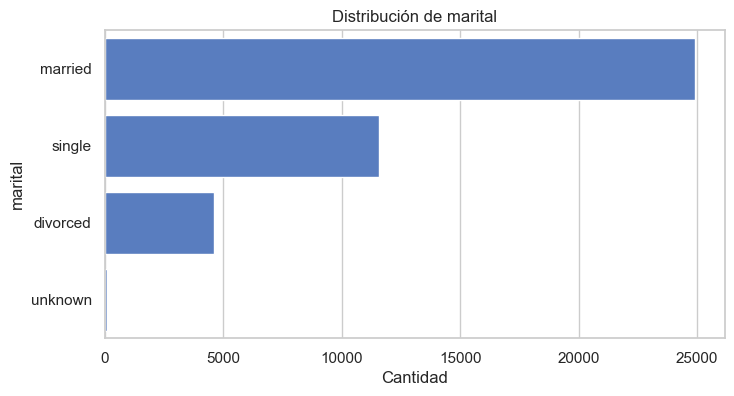

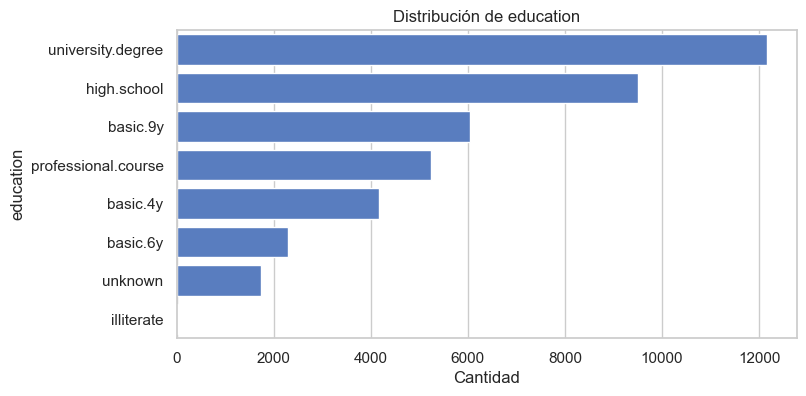

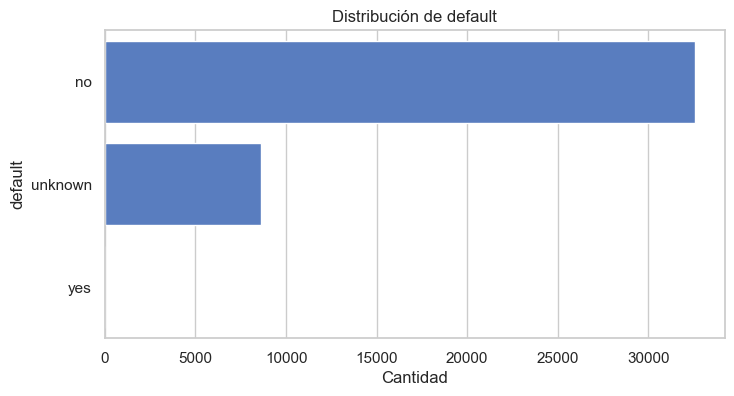

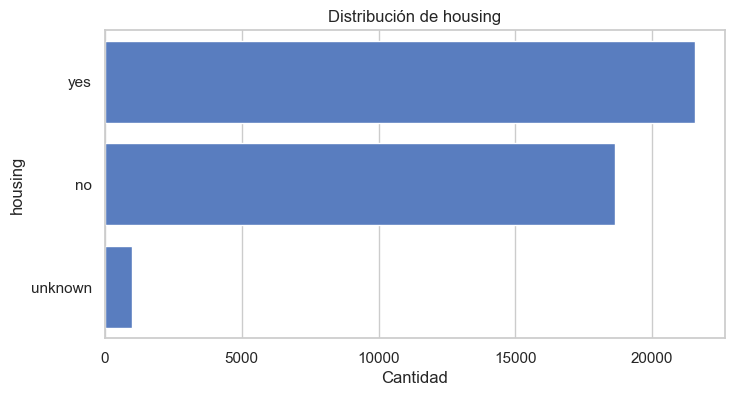

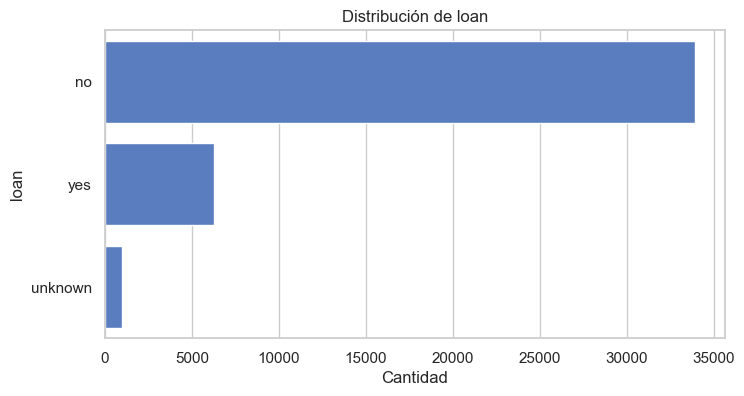

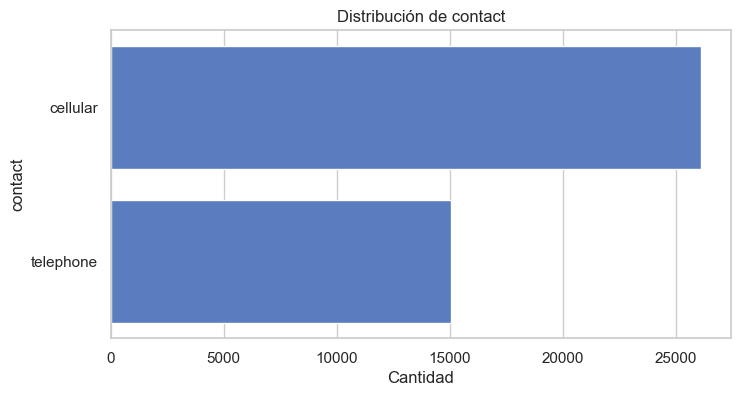

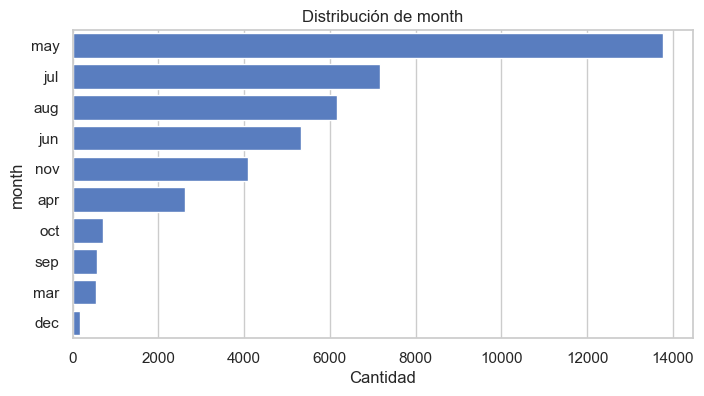

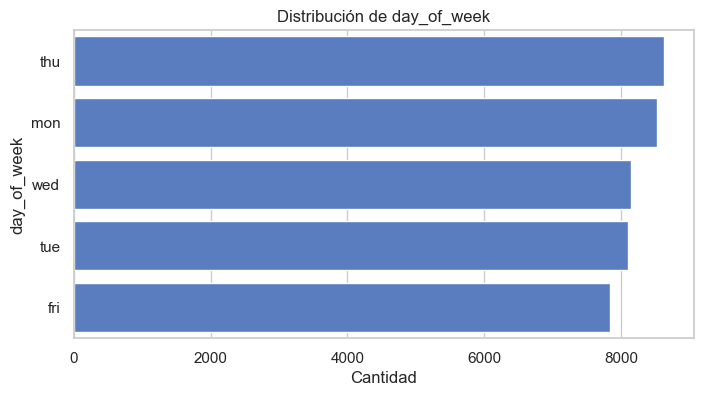

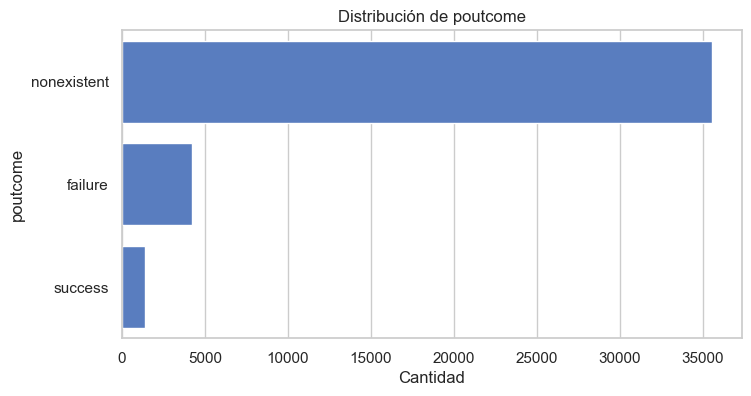

In [8]:
categorical_cols = df.select_dtypes(include=["object"]).columns.drop("y")

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index
    sns.countplot(y=col, data=df, order=order)
    plt.title(f"Distribución de {col}")
    plt.xlabel("Cantidad")
    plt.ylabel(col)
    plt.show()


### Correlación entre variables numéricas

La correlación entre variables numéricas permite identificar relaciones lineales entre ellas y, consiguientemente, patrones que pueden ser útiles en modelos predictivos.

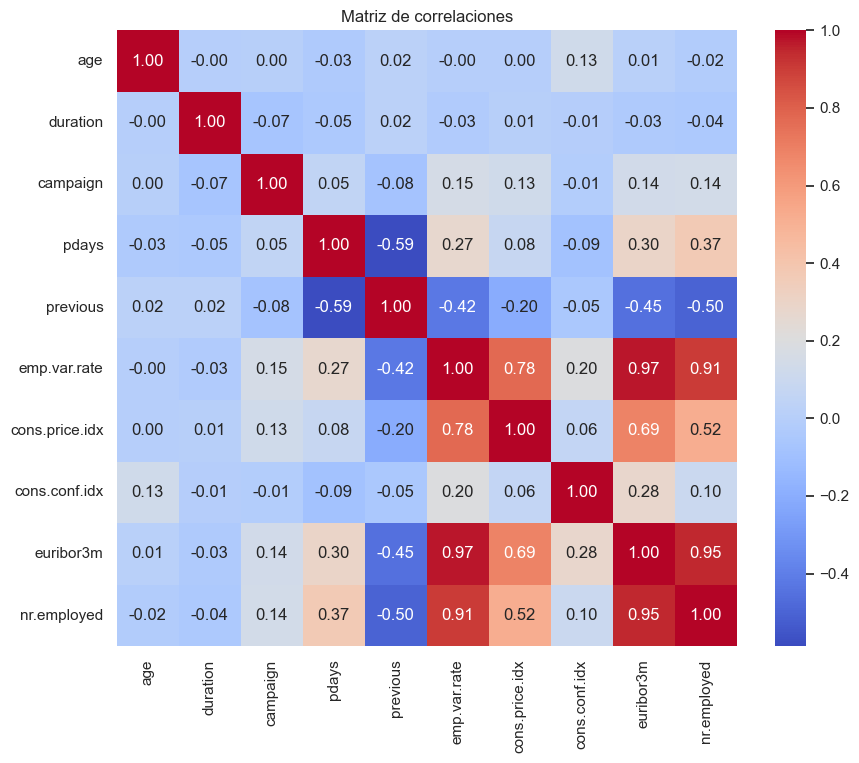

In [9]:
num_df = df.select_dtypes(include=['float64', 'int64'])
corr = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()